In [40]:
import pandas as pd
from pyspark.sql.functions import col, monotonically_increasing_id
import pyspark.sql.functions as f
from pyspark.sql import functions as F
import pyspark.sql.types as t
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import json
from pandas.io.json import json_normalize
from urllib.request import urlopen

In [41]:
# Online data source
onlineData = 'https://randomuser.me/api/?results=500'

In [42]:
# read the online data file
httpData = urlopen(onlineData).read()

In [43]:
data=json.loads(httpData)

In [44]:
df = json_normalize(data['results'])

In [45]:
df.head()

,cell,dob.age,dob.date,email,gender,id.name,id.value,location.city,location.coordinates.latitude,location.coordinates.longitude,location.country,location.postcode,location.state,location.street.name,location.street.number,location.timezone.description,location.timezone.offset,login.md5,login.password,login.salt,login.sha1,login.sha256,login.username,login.uuid,name.first,name.last,name.title,nat,phone,picture.large,picture.medium,picture.thumbnail,registered.age,registered.date
0,699-430-269,70,1952-12-20T02:26:51.350Z,samuel.cruz@example.com,male,DNI,56205042-J,Arrecife,-17.0146,-124.2978,Spain,71508,Andalucía,Calle de La Luna,2133,Kathmandu,+5:45,429941599ca62022d005390433aa9290,vamp,e9nHPTCk,91727e0e63bc1b648b2f189b1984988f79dd1153,e456666f58ed1b7f8a817c111c112886d9580650b8686e...,lazyfish559,e2b3810a-1f38-4ab7-af84-82aa6e4586c6,Samuel,Cruz,Mr,ES,949-235-373,https://randomuser.me/api/portraits/men/65.jpg,https://randomuser.me/api/portraits/med/men/65...,https://randomuser.me/api/portraits/thumb/men/...,9,2013-06-03T21:09:09.787Z
1,(738)-846-7305,35,1987-03-08T07:08:44.488Z,sylvian.vrij@example.com,male,BSN,33943574,De Veenhoop,87.4285,155.0631,Netherlands,61975,Flevoland,Bottersteeg,4791,"Midway Island, Samoa",-11:00,dea14c2f75a4f90dc2a5e0c453a6f651,account,0gPtkfq9,b417a93d336c10ee65e40497cf38c87d2fa1c127,4811c21a0a84e5f08fc1ceb6c0bedbf658eabf1feb56ac...,lazykoala676,7603af8a-3081-4745-85df-073219f1a421,Sylvian,Vrij,Mr,NL,(324)-826-0074,https://randomuser.me/api/portraits/men/24.jpg,https://randomuser.me/api/portraits/med/men/24...,https://randomuser.me/api/portraits/thumb/men/...,11,2011-07-22T13:52:05.715Z
2,96647790,30,1992-05-25T18:20:26.840Z,mads.nielsen@example.com,male,CPR,250592-0260,Ansager,-42.6683,173.5415,Denmark,13976,Midtjylland,Ådalen,4543,Kabul,+4:30,14b09760f5c1508be9a83170839f98e2,photos,tX8Dx8L3,3d601517d6e7be773aa06500831f1870abf303d1,1cf4c6f134cadfd2651eef23c5bd3f8077f4e372cecc0e...,heavygoose501,187ac835-36c3-4a10-b6c5-dd6ac50965f6,Mads,Nielsen,Mr,DK,65647648,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...,19,2003-01-14T06:48:27.762Z
3,0727-446-029,27,1995-07-30T06:47:57.233Z,roger.washington@example.com,male,NINO,ZK 50 10 99 V,Leeds,-18.2957,18.8210,United Kingdom,K6 6DF,Wiltshire,Grove Road,3727,"Ekaterinburg, Islamabad, Karachi, Tashkent",+5:00,81a4e37eb35fa69b41104579de3166cb,rachel1,xp3e8FHW,2876ec6eebcf9cf6dbfd802cc13610b14c4d8d76,9113667df540ba4a7d734289c796d52e582bd4056ffca8...,sadfrog920,b75689a7-f170-45cf-b6f9-db757e0b9897,Roger,Washington,Mr,GB,022 7900 9940,https://randomuser.me/api/portraits/men/16.jpg,https://randomuser.me/api/portraits/med/men/16...,https://randomuser.me/api/portraits/thumb/men/...,7,2015-02-21T11:07:55.052Z
4,373-786-8586,39,1983-02-19T11:39:39.100Z,alexis.lo@example.com,female,,None,Cartwright,38.8326,67.3765,Canada,R5F 6D1,British Columbia,Pierre Ave,4135,"Brazil, Buenos Aires, Georgetown",-3:00,b8b81b36c0172e5ce634735bbcbf7d6d,woodstoc,UObQU82V,0d830ae556679947830967c2fa66e91ca241f47d,e7faab1ab4f079fab4f084061a4b3e0834ac8849ef3148...,ticklishbutterfly309,7eeaa6bc-f003-4a08-9dfb-536f163d1f88,Alexis,Lo,Ms,CA,957-790-4925,https://randomuser.me/api/portraits/women/75.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,12,2010-04-17T13:49:04.564Z


In [46]:
pd.set_option('max_columns', None)

In [47]:
df.head()

,cell,dob.age,dob.date,email,gender,id.name,id.value,location.city,location.coordinates.latitude,location.coordinates.longitude,location.country,location.postcode,location.state,location.street.name,location.street.number,location.timezone.description,location.timezone.offset,login.md5,login.password,login.salt,login.sha1,login.sha256,login.username,login.uuid,name.first,name.last,name.title,nat,phone,picture.large,picture.medium,picture.thumbnail,registered.age,registered.date
0,699-430-269,70,1952-12-20T02:26:51.350Z,samuel.cruz@example.com,male,DNI,56205042-J,Arrecife,-17.0146,-124.2978,Spain,71508,Andalucía,Calle de La Luna,2133,Kathmandu,+5:45,429941599ca62022d005390433aa9290,vamp,e9nHPTCk,91727e0e63bc1b648b2f189b1984988f79dd1153,e456666f58ed1b7f8a817c111c112886d9580650b8686e...,lazyfish559,e2b3810a-1f38-4ab7-af84-82aa6e4586c6,Samuel,Cruz,Mr,ES,949-235-373,https://randomuser.me/api/portraits/men/65.jpg,https://randomuser.me/api/portraits/med/men/65...,https://randomuser.me/api/portraits/thumb/men/...,9,2013-06-03T21:09:09.787Z
1,(738)-846-7305,35,1987-03-08T07:08:44.488Z,sylvian.vrij@example.com,male,BSN,33943574,De Veenhoop,87.4285,155.0631,Netherlands,61975,Flevoland,Bottersteeg,4791,"Midway Island, Samoa",-11:00,dea14c2f75a4f90dc2a5e0c453a6f651,account,0gPtkfq9,b417a93d336c10ee65e40497cf38c87d2fa1c127,4811c21a0a84e5f08fc1ceb6c0bedbf658eabf1feb56ac...,lazykoala676,7603af8a-3081-4745-85df-073219f1a421,Sylvian,Vrij,Mr,NL,(324)-826-0074,https://randomuser.me/api/portraits/men/24.jpg,https://randomuser.me/api/portraits/med/men/24...,https://randomuser.me/api/portraits/thumb/men/...,11,2011-07-22T13:52:05.715Z
2,96647790,30,1992-05-25T18:20:26.840Z,mads.nielsen@example.com,male,CPR,250592-0260,Ansager,-42.6683,173.5415,Denmark,13976,Midtjylland,Ådalen,4543,Kabul,+4:30,14b09760f5c1508be9a83170839f98e2,photos,tX8Dx8L3,3d601517d6e7be773aa06500831f1870abf303d1,1cf4c6f134cadfd2651eef23c5bd3f8077f4e372cecc0e...,heavygoose501,187ac835-36c3-4a10-b6c5-dd6ac50965f6,Mads,Nielsen,Mr,DK,65647648,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...,19,2003-01-14T06:48:27.762Z
3,0727-446-029,27,1995-07-30T06:47:57.233Z,roger.washington@example.com,male,NINO,ZK 50 10 99 V,Leeds,-18.2957,18.8210,United Kingdom,K6 6DF,Wiltshire,Grove Road,3727,"Ekaterinburg, Islamabad, Karachi, Tashkent",+5:00,81a4e37eb35fa69b41104579de3166cb,rachel1,xp3e8FHW,2876ec6eebcf9cf6dbfd802cc13610b14c4d8d76,9113667df540ba4a7d734289c796d52e582bd4056ffca8...,sadfrog920,b75689a7-f170-45cf-b6f9-db757e0b9897,Roger,Washington,Mr,GB,022 7900 9940,https://randomuser.me/api/portraits/men/16.jpg,https://randomuser.me/api/portraits/med/men/16...,https://randomuser.me/api/portraits/thumb/men/...,7,2015-02-21T11:07:55.052Z
4,373-786-8586,39,1983-02-19T11:39:39.100Z,alexis.lo@example.com,female,,None,Cartwright,38.8326,67.3765,Canada,R5F 6D1,British Columbia,Pierre Ave,4135,"Brazil, Buenos Aires, Georgetown",-3:00,b8b81b36c0172e5ce634735bbcbf7d6d,woodstoc,UObQU82V,0d830ae556679947830967c2fa66e91ca241f47d,e7faab1ab4f079fab4f084061a4b3e0834ac8849ef3148...,ticklishbutterfly309,7eeaa6bc-f003-4a08-9dfb-536f163d1f88,Alexis,Lo,Ms,CA,957-790-4925,https://randomuser.me/api/portraits/women/75.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,12,2010-04-17T13:49:04.564Z


In [48]:
df.dtypes

cell                              object
dob.age                            int64
dob.date                          object
email                             object
gender                            object
id.name                           object
id.value                          object
location.city                     object
location.coordinates.latitude     object
location.coordinates.longitude    object
location.country                  object
location.postcode                 object
location.state                    object
location.street.name              object
location.street.number             int64
location.timezone.description     object
location.timezone.offset          object
login.md5                         object
login.password                    object
login.salt                        object
login.sha1                        object
login.sha256                      object
login.username                    object
login.uuid                        object
name.first      

In [49]:
# initiate spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:2.7.0").\
enableHiveSupport().getOrCreate()

In [50]:
from pyspark.sql.types import *

In [51]:
mySchema = StructType([ StructField("cell", StringType(), True)\
                       ,StructField("dob.age", IntegerType(), True)\
                      ,StructField("dob.date", StringType(), True)\
                       ,StructField("email", StringType(), True)\
                       ,StructField("gender", StringType(), True)\
                       ,StructField("id.name", StringType(), True)\
                       ,StructField("id.value", StringType(), True)\
                       ,StructField("location.city", StringType(), True)\
                       ,StructField("location.coordinates.latitude", StringType(), True)\
                       ,StructField("location.coordinates.longitude", StringType(), True)\
                       ,StructField("location.country", StringType(), True)\
                       ,StructField("location.postcode", StringType(), True)\
                       ,StructField("location.state", StringType(), True)\
                        ,StructField("location.street.name", StringType(), True)\
                       ,StructField("location.street.number", IntegerType(), True)\
                        ,StructField("location.timezone.description", StringType(), True)\
                       ,StructField("location.timezone.offset", StringType(), True)\
                       ,StructField("login.md5", StringType(), True)\
                       ,StructField("login.password", StringType(), True)\
                       ,StructField("login.salt", StringType(), True)\
                       ,StructField("login.sha1", StringType(), True)\
                       ,StructField("login.sha256", StringType(), True)\
                       ,StructField("login.username", StringType(), True)\
                       ,StructField("login.uuid", StringType(), True)\
                       ,StructField("name.first", StringType(), True)\
                       ,StructField("name.last", StringType(), True)\
                       ,StructField("name.title", StringType(), True)\
                       ,StructField("nat", StringType(), True)\
                       ,StructField("phone", StringType(), True)\
                       ,StructField("picture.large", StringType(), True)\
                       ,StructField("picture.medium", StringType(), True)\
                       ,StructField("picture.thumbnail", StringType(), True)\
                       ,StructField("registered.age", StringType(), True)\
                       ,StructField("registered.date", StringType(), True)
                       
                      ])

In [52]:
# Load pd dateframe into pyspark dateframe
sparkDF=spark.createDataFrame(df,schema=mySchema) 

<!--  gender varchar
    name_title varchar
    first_name varchar
    last_name varchar
    street varchar
    city varchar
    state varchar
    postcode varchar
    latitude double
    longitude double
    time_zone_offset varchar 
    time_zone_description varchar
    email varchar
    uuid varchar
    username varchar
    password varchar
    salt varchar
    md5 varchar
    sha1 varchar
    sha256 varchar
    dob datetime
    age int
    registered_date datetime
    registered_age int
    phone VARCHAR
    cell VARCHAR
    id_name VARCHAR
    id_value VARCHAR
    picture_large VARCHAR
    picture_medium VARCHAR
    picture_thumbnail VARCHAR
    nat VARCHAR -->

In [53]:
new_cols=(column.replace('.', '_') for column in sparkDF.columns)
sparkDF = sparkDF.toDF(*new_cols)

In [54]:
# convert ISO date to datetime
sparkDF=sparkDF.withColumn('new_DOB', F.to_date(col("dob_date")))
sparkDF=sparkDF.withColumn('new_register_date', F.to_date(col("registered_date")))

In [55]:
sparkDF.printSchema()

root
 |-- cell: string (nullable = true)
 |-- dob_age: integer (nullable = true)
 |-- dob_date: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- id_name: string (nullable = true)
 |-- id_value: string (nullable = true)
 |-- location_city: string (nullable = true)
 |-- location_coordinates_latitude: string (nullable = true)
 |-- location_coordinates_longitude: string (nullable = true)
 |-- location_country: string (nullable = true)
 |-- location_postcode: string (nullable = true)
 |-- location_state: string (nullable = true)
 |-- location_street_name: string (nullable = true)
 |-- location_street_number: integer (nullable = true)
 |-- location_timezone_description: string (nullable = true)
 |-- location_timezone_offset: string (nullable = true)
 |-- login_md5: string (nullable = true)
 |-- login_password: string (nullable = true)
 |-- login_salt: string (nullable = true)
 |-- login_sha1: string (nullable = true)
 |-- login_sha256: 

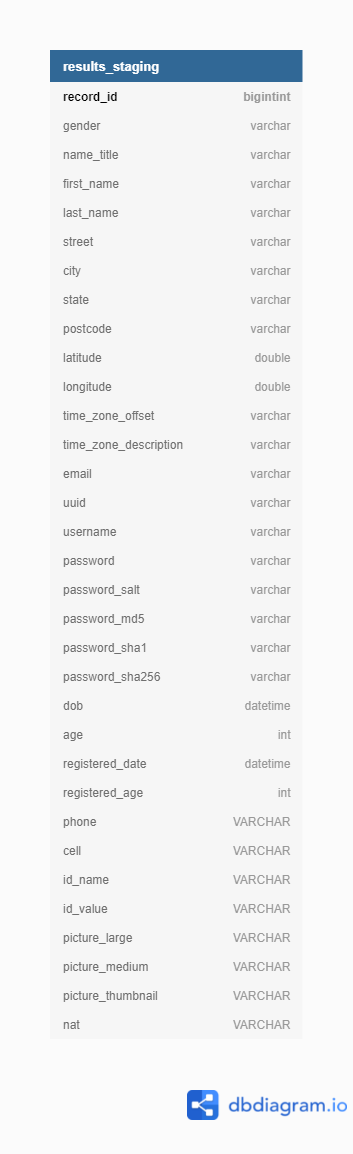

In [98]:
from IPython import display
display.Image("/home/workspace/Home_work/Staging_table.png")

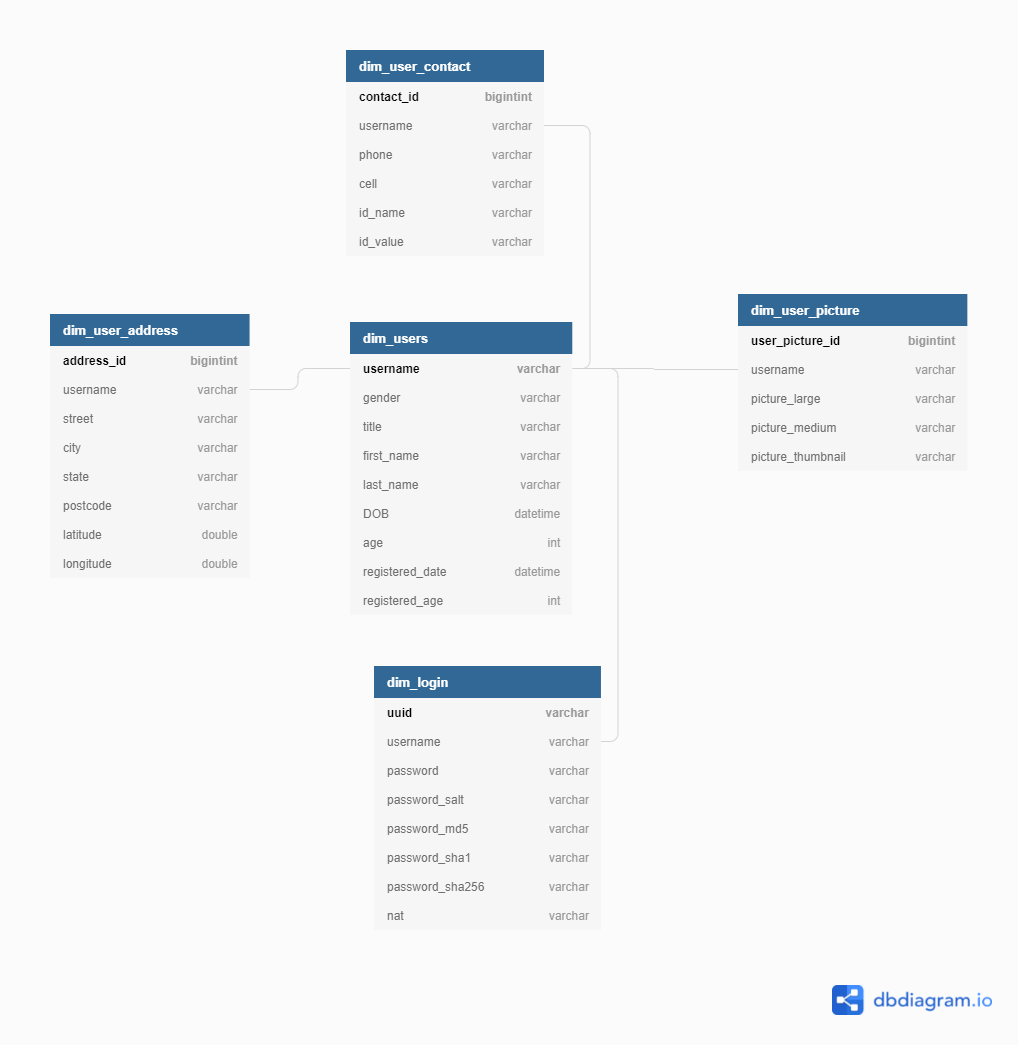

In [99]:
display.Image("/home/workspace/Home_work/dim_tables.png")

In [56]:
sparkDF.createOrReplaceTempView("main_table")

In [57]:
# create staging table
stageingDF = spark.sql('''
    select gender,
    name_title,
    name_first as first_name,
    name_last as last_name,
    concat(location_street_number , ' ' , location_street_name) as street,
    location_city as city,
    location_state as state,
    location_postcode as postcode,
    cast(location_coordinates_latitude as decimal(10,4)) as latitude,
    cast(location_coordinates_longitude as decimal(10,4)) as longitude,
    location_timezone_offset as timezone_offset,
    location_timezone_description as timezone_description,
    email,
    login_uuid as uuid,
    login_username as username,
    login_password as password,
    login_salt as password_salt,
    login_md5 as password_md5,
    login_sha1 as password_sha1,
    login_sha256 as password_sha256,
    new_DOB as dob,
    dob_age as age,
    new_register_date as registered_date,
    cast(registered_age  as int) as registered_age,
    phone,
    cell,
    id_name,
    id_value,
    picture_large,
    picture_medium,
    picture_thumbnail,
    nat
    
    from main_table
'''
)

In [58]:
stageingDF.show(3,truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------
 gender               | male                                                             
 name_title           | Mr                                                               
 first_name           | Samuel                                                           
 last_name            | Cruz                                                             
 street               | 2133 Calle de La Luna                                            
 city                 | Arrecife                                                         
 state                | Andalucía                                                        
 postcode             | 71508                                                            
 latitude             | -17.0146                                                         
 longitude            | -124.2978                                                        
 timezone_

#### Create each dim table:
* dim_users
* dim_user_address
* dim_user_contact
* dim_user_picture
* dim_login

In [60]:
stageingDF.createOrReplaceTempView("stageingDF")

In [61]:
UserDF = spark.sql('''
    select username,
    gender,
    name_title,
    first_name,
    last_name,
    dob,
    age,
    registered_date,
    registered_age
    FROM stageingDF
'''
)

In [62]:
UserAddressDF = spark.sql('''
    select username,
    street,
    city,
    state,
    postcode,
    latitude,
    longitude
    FROM stageingDF
'''
)

In [63]:
UserContactDF = spark.sql('''
    select username,
    phone,
    cell,
    id_name,
    id_value
    FROM stageingDF
'''
)

In [64]:
UserPictureDF = spark.sql('''
    select username,
    picture_large,
    picture_medium,
    picture_thumbnail
    FROM stageingDF
'''
)

In [65]:
LoginDF = spark.sql('''
    select username,
    password,
    password_salt,
    password_md5,
    password_sha1,
    password_sha256,
    nat
    FROM stageingDF
'''
)

In [84]:
# Do some data quality check
print((UserDF.count(), len(UserDF.columns)))
print((UserAddressDF.count(), len(UserAddressDF.columns)))
print((UserContactDF.count(), len(UserContactDF.columns)))
print((UserPictureDF.count(), len(UserPictureDF.columns)))
print((LoginDF.count(), len(LoginDF.columns)))

(500, 9)
(500, 7)
(500, 5)
(500, 4)
(500, 7)


#### Write the data into a single csv for each table

In [101]:
UserDF.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("/home/workspace/User_table.csv")

In [79]:
UserAddressDF.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("User_address_table.csv")

In [80]:
UserContactDF.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("User_contact_table.csv")

In [81]:
UserPictureDF.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("User_picturet_table.csv")

In [82]:
LoginDF.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("login_table.csv")

###### If this is a production ETL, the data volumne would be expected to increase so we can consider using S3 as the place for data lake. 
###### We can upload the staging table into S3 first then create staging table with other dim tables on Redshift
###### Then we can issue copy command to load the data into Redshift